## Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

## Problema 1

Implemente el método de interpolación de Lagrange que ajuste un polinomio de grado 4 a los siguientes datos experimentales.



```
    x_values = 4, 7, 8, 12,  17
    y_values = 8, 16, 3,  5,  0
```

El código debe generar una figura que contenga los puntos asociados a los datos experimentales y la curva generada por el polinomio de Lagrange. Gráfique en el intervalo $[3, 18]$.

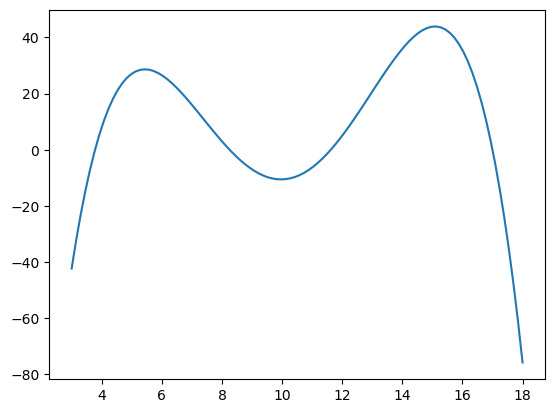

In [4]:
X = np.array([ 4, 7, 8, 12,  17])
Y = np.array([ 8, 16, 3,  5,  0])

## tu codigo aqui



def Lagrange_coeff(x,xi,j):
    n = len(xi)
    prod = 1
    
    for i in range(n):
        prod *= (x - xi[i])/(xi[j]-xi[i]) if i != j else 1
        
    return prod

def Lagrange_inter(x,xi,yi):
    Sum = 0
    for j in range(len(yi)):
        Sum += yi[j]*Lagrange_coeff(x,xi,j)
        
    return Sum

x = np.linspace(3,18,100)
y = Lagrange_inter(x,X,Y)

plt.plot(x,y)



b) Explique cuál es la intuición detras de la fórmula de interpolación de Lagrange. 

La intución detrás de la fórmula para la interpolación de Lagrange es que cada valor de $y$ del par odernado en el conjunto soporte $\Omega$
se le asigna un valor de $\mathcal{L}_j$ que corresponderiente a las aportaciones de ése punto a la sumatoria del polimonio que 
se interpola. Siendo este cero en caso de que $x = x_j $

## Problema 2

Diseñe un método que obtenga el valor en $x$ para el cual el polinomio interpolador del problema anterior es máximo. Guarde el resultado obtenido en la variable `x_value`, e imprima ese valor. 

In [49]:
x_value = 0

## tu codigo aqui
interval = np.linspace(3,18,1000)
x = sym.Symbol('x',real=True)
f = Lagrange_inter(x,X,Y)
f = sym.simplify(f)
df = sym.diff(f,x)
func = sym.lambdify([x],f,'numpy')
dfunc = sym.lambdify([x],df,'numpy')


def Search4Max(x,f,dif):
    pc = []
    for i in x:
        if abs(dif(i)) <= 1e-1:
            pc.append(i)
    maxy = f(pc[0])
    maxx = pc[0]
    for i in pc:
        if maxy < f(i):
            maxy = f(i)
            maxx = i
    return (maxx,maxy)
    
   

x_value = Search4Max(interval,func,dfunc)[0]


# codigo para verificar su resultado (no modificar)
print(x_value)

15.087087087087086
